## Data science Assessment: Problem, Analysis and Solution

<b>Title : Walmart - Store Sales Forecasting</b>

Problem Statement : You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

More details regarding the problem can be find from kaggle.com: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data.

## What's included in the Solution

1. A detailed analysis and solution file with descriptions
2. A scoring metric to decide which model/algorithm is "better."
3. Feature selection framework to implement an optimized model selection approach.

## Analysis and Solution

In [1]:
# list of all the libraries required for the solution
import pandas as pd
import numpy as np # linear algebra
from pandas import datetime

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
# Step 1 : Data Acqusition & Loading
# 1.1 Load the traing Data Set
trainingData = pd.read_csv('train.csv')
print(trainingData.shape)
print(trainingData.head(5))
# 1.2 Load the test Data Set
testData = pd.read_csv('test.csv')
print(testData.shape)
print(testData.head(5))
# 1.3 Load the test features Data Set
features = pd.read_csv('features.csv')
print(features.shape)
print(features.head(5))
# 1.4 Load the test Stores Data Set
stores = pd.read_csv('stores.csv')
print(stores.shape)
stores.head()

(421570, 5)
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
(115064, 4)
   Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False
(8190, 12)
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [3]:
# Step 2 : Data Integration based on project requirements
# 2.1 Merge all the train, features and stores data to build a combined training set
trainingData = trainingData.merge(stores, how='left').merge(features, how='left')
print(trainingData.shape)
print(trainingData.head(5))
trainingData.to_csv('./OutputFiles/trainData.csv', index=False)
# 2.2 Merge all the testData, features and stores data to build a combined test data set
testData = testData.merge(stores, how='left').merge(features, how='left')
print(testData.shape)
print(testData.head(5))
testData.to_csv('./OutputFiles/testData.csv', index=False)

(421570, 16)
   Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     1  2010-02-12      46039.49       True    A  151315        38.51   
2      1     1  2010-02-19      41595.55      False    A  151315        39.93   
3      1     1  2010-02-26      19403.54      False    A  151315        46.63   
4      1     1  2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.

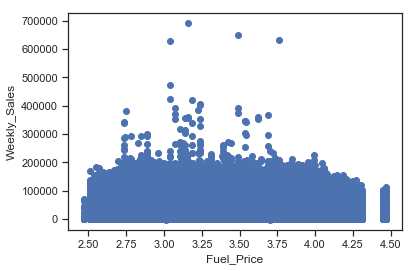

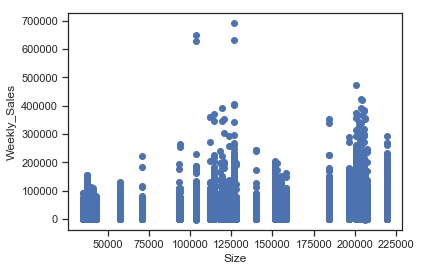

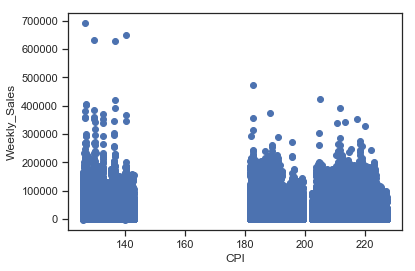

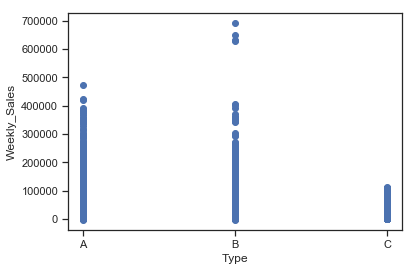

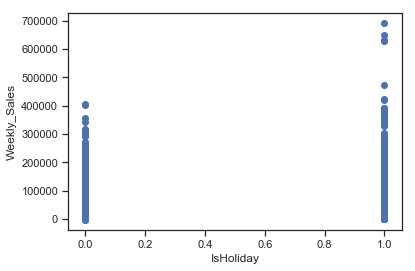

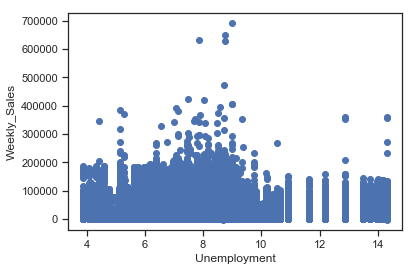

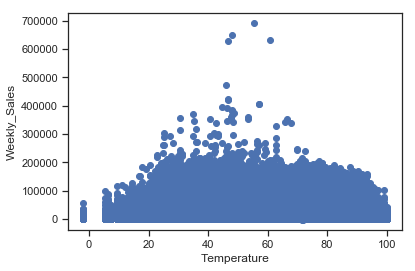

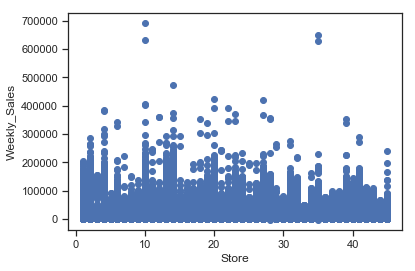

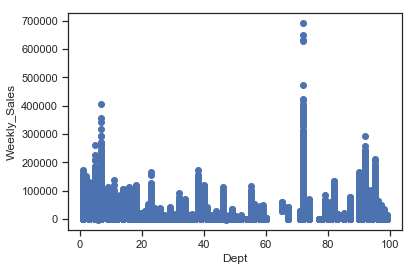

In [4]:
# Step 3 : Data Analysis
# Use Scatter plots to visualize the data and it's landscape
def scatter(trainingData, column):
    plt.figure()
    plt.scatter(trainingData[column] , trainingData['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

scatter(trainingData, 'Fuel_Price')
scatter(trainingData, 'Size')
scatter(trainingData, 'CPI')
scatter(trainingData, 'Type')
scatter(trainingData, 'IsHoliday')
scatter(trainingData, 'Unemployment')
scatter(trainingData, 'Temperature')
scatter(trainingData, 'Store')
scatter(trainingData, 'Dept')

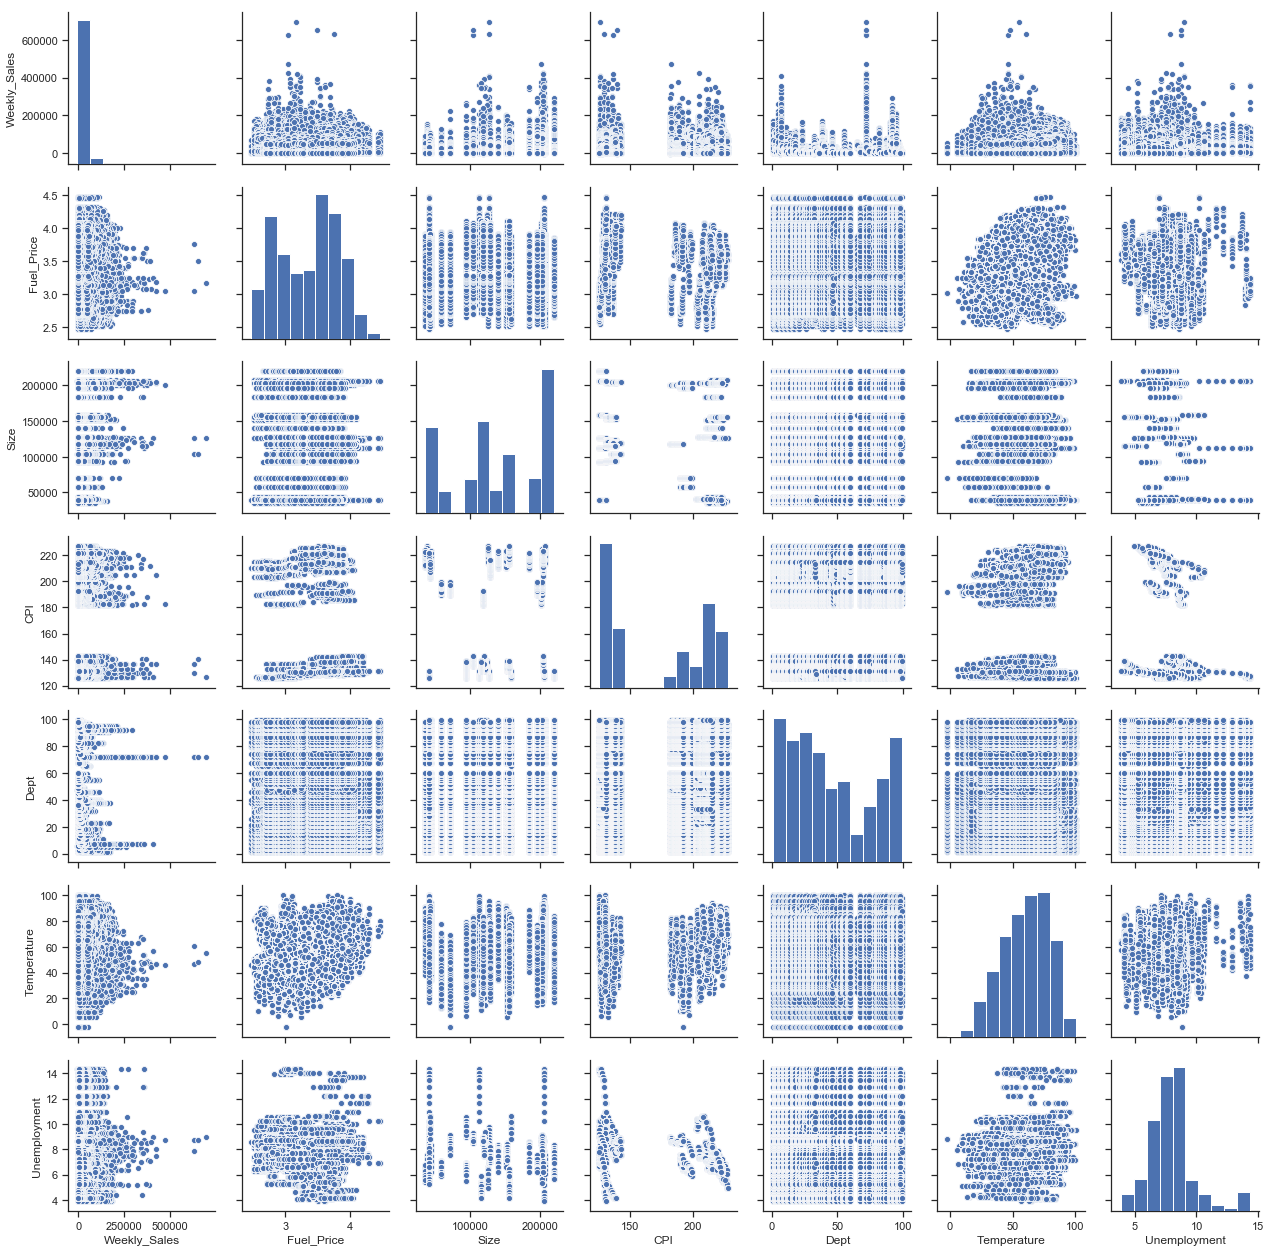

In [5]:
# Use pair plot to Visualize the pairs
sns.pairplot(trainingData, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

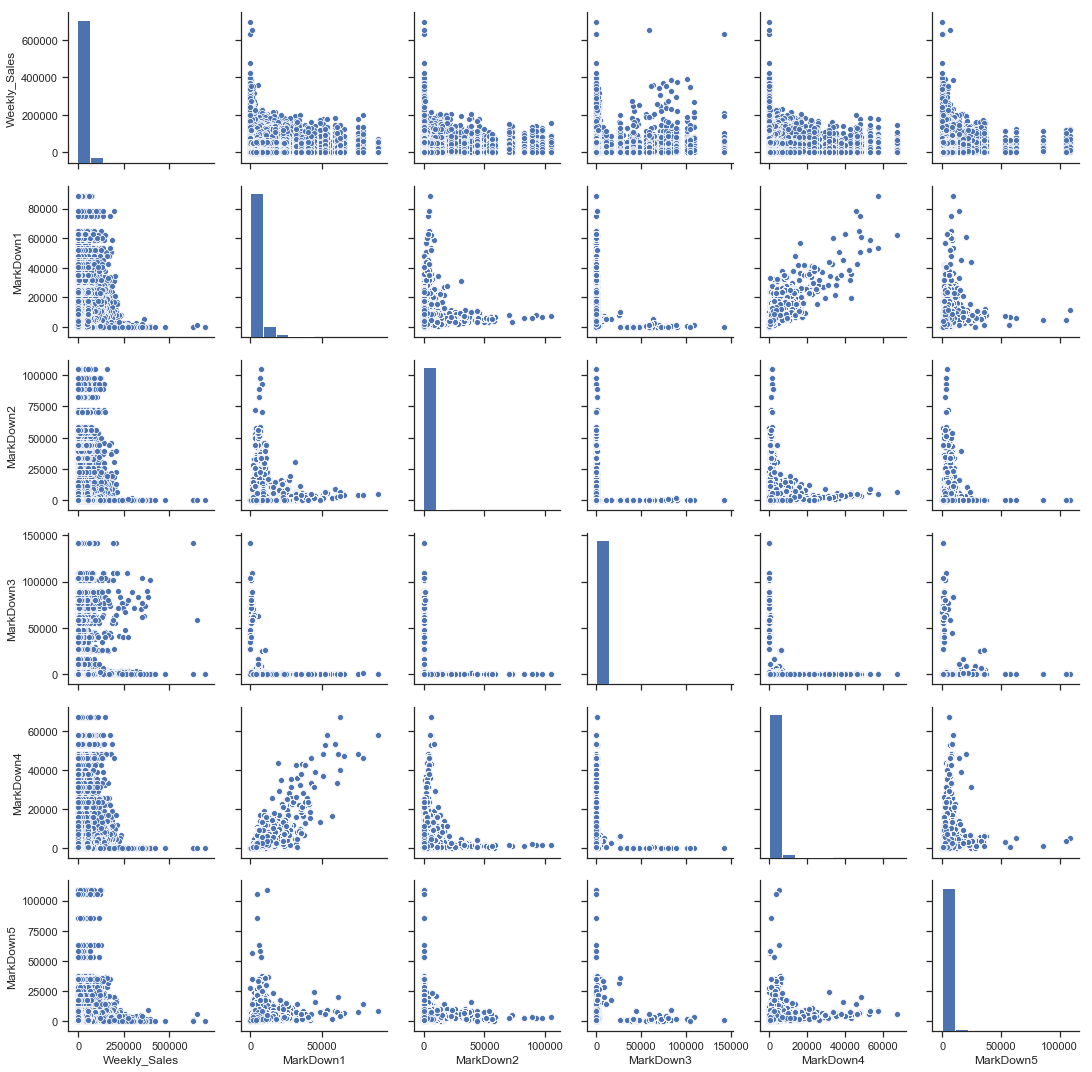

In [6]:
# Use pair plot to Visualize the pairs Continuation...
sns.pairplot(trainingData.fillna(0), vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [7]:
# Step 4 : Data Preparation & Manipulations
# 4.1 Preparation of the training Dataset
trainingData = pd.get_dummies(trainingData, columns=["Type"])
#trainData['IsHoliday'] = trainData['IsHoliday'].replace(True, 1).replace(False, 0)
trainingData[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = trainingData[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
trainingData['Month'] = pd.to_datetime(trainingData['Date']).dt.month
# Drop the insignificant data based on your analysis with the plots
trainingData = trainingData.drop(columns=["Date"])
#trainData = trainData.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3','Temperature'])
print(trainingData.head(5))
# 4.2 Preparation of the test Dataset
testData = pd.get_dummies(testData, columns=["Type"])
#testData['IsHoliday'] = testData['IsHoliday'].replace(True, 1).replace(False, 0)
testData[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = testData[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
testData = testData.fillna(0)
column_date = testData['Date']
print(column_date)
testData['Month'] = pd.to_datetime(testData['Date']).dt.month
testData = testData.drop(columns=["Date"])
#testData = testData.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature', 'MarkDown3'])
print(testData.head(10))

   Store  Dept  Weekly_Sales  IsHoliday    Size  Temperature  Fuel_Price  \
0      1     1      24924.50      False  151315        42.31       2.572   
1      1     1      46039.49       True  151315        38.51       2.548   
2      1     1      41595.55      False  151315        39.93       2.514   
3      1     1      19403.54      False  151315        46.63       2.561   
4      1     1      21827.90      False  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0        0.0        0.0  211.289143   
3        0.0        0.0        0.0        0.0        0.0  211.319643   
4        0.0        0.0        0.0        0.0        0.0  211.350143   

   Unemployment  Type_A  Type_B  Type_C  Month  
0         8.106       1       0       0      2  
1         8.

In [8]:
# Define the Suitable Models for Analysis
def extraTreesRegressor(train_x, train_y):
    model = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
    model.fit(train_x, train_y)
    return model

def randomForestRegressor(train_x, train_y):
    model = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
    model.fit(train_x, train_y)
    return model

def neuralnet(train_x, train_y):
    model = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', verbose=3)
    model.fit(train_x, train_y)
    return model

def fnFeatureImportance(fit_model, X_train):
    """
    Model based feature importance

    Parameters
    ----------
    fit_model : Trained model
    x_train: pandas dataframe Training data

    Returns
    -------
    list Important features based on the model.
    """

    #get important features
    importances = fit_model.feature_importances_

    important_feature_index = [i for i, x in enumerate(importances) if x != 0]
    important_features_to_model = X_train.iloc[:, important_feature_index]

    #save features with importance > 0
    reducedSet = important_features_to_model.columns

    return reducedSet

# Predict function to execute the Model predictions
def predict_(m, test_x):
    return pd.Series(m.predict(test_x))

# Train Model to execute the Model
def trainModel_(model, train_x, train_y):
    if (model == "extraTreesRegressor"):
        return extraTreesRegressor(train_x, train_y)
    elif (model == "randomForestRegressor"):
        return randomForestRegressor(train_x, train_y)
    elif (model == "neuralnet"):
        return neuralnet(train_x, train_y)

In [9]:
# Function for Error Calculations
def calculate_error(test_y, predicted, weights):
    return mean_absolute_error(test_y, predicted, sample_weight=weights)

In [11]:
# Validation features using KFold to calculate the prediction accuracy
kfoldValidation = KFold(n_splits=4)
splitedData = []
for name, group in trainingData.groupby(["Store", "Dept"]):
    group = group.reset_index(drop=True)
    # Define input & output datasets
    X_trains = []
    y_trains = []
    X_tests = []
    y_tests = []
    if group.shape[0] <= 4:
        f = np.array(range(4))
        np.random.shuffle(f)
        group['fold'] = f[:group.shape[0]]
        continue
    fold = 0
    for train_index, test_index in kfoldValidation.split(group):
        group.loc[test_index, 'fold'] = fold
        fold += 1
    splitedData.append(group)
# Integrating the splited data
splitedData = pd.concat(splitedData).reset_index(drop=True)

In [12]:
# Executing the logic to calculate the error factor and to pick the right model
ModelArray = ['extraTreesRegressor', 'randomForestRegressor', 'neuralnet']
best_model = None
best_error = np.iinfo(np.int32).max
for selcted in ModelArray:
    for fold in range(4):
        print(selcted)
        ds_Train = splitedData.loc[splitedData['fold'] != fold]
        ds_Test = splitedData.loc[splitedData['fold'] == fold]
        X_train = ds_Train.drop(columns=['Weekly_Sales', 'fold'])
        y_train = ds_Train['Weekly_Sales']

        X_test = ds_Test.drop(columns=['Weekly_Sales', 'fold'])
        y_test = ds_Test['Weekly_Sales']

        #predicted, model = train_and_predict(X_train, y_train, X_test)
        model = trainModel_(selcted, X_train, y_train)
               
        # Apply model based feature importance selection if the selected model is not neuralnet
        if (selcted != "neuralnet"):
            #feature importance    
            reducedSet = fnFeatureImportance(model, X_train)
            print("Model based Important features :")
            print(reducedSet)
            #reduced subset with important features
            X_test = X_test[reducedSet].reset_index(drop = True)
        
        predicted = predict_(model, X_test)
        # Applying weightage to if is IsHoliday is true
        weights = X_test['IsHoliday'].replace(True, 5).replace(False, 1)
        # Calculating the error factor
        error = calculate_error(y_test, predicted, weights)
        #print(fold, error)
        if error < best_error:
            # print('Find best model')
            best_error = error
            best_model = model
print("The Best model is : ")
print(best_model)
print("The Best error is : " + str(best_error))

extraTreesRegressor


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.4min finished


Model based Important features :
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type_A', 'Type_B', 'Type_C', 'Month'],
      dtype='object')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished


extraTreesRegressor


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.5min finished


Model based Important features :
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type_A', 'Type_B', 'Type_C', 'Month'],
      dtype='object')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished


extraTreesRegressor


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished


Model based Important features :
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type_A', 'Type_B', 'Type_C', 'Month'],
      dtype='object')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


extraTreesRegressor


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished


Model based Important features :
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type_A', 'Type_B', 'Type_C', 'Month'],
      dtype='object')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished


randomForestRegressor


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


Model based Important features :
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type_A', 'Type_B', 'Type_C', 'Month'],
      dtype='object')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


randomForestRegressor


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


Model based Important features :
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type_A', 'Type_B', 'Type_C', 'Month'],
      dtype='object')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


randomForestRegressor


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


Model based Important features :
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type_A', 'Type_B', 'Type_C', 'Month'],
      dtype='object')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


randomForestRegressor


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


Model based Important features :
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type_A', 'Type_B', 'Type_C', 'Month'],
      dtype='object')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


neuralnet
Iteration 1, loss = 251178376.50502834
Iteration 2, loss = 250511260.97170627
Iteration 3, loss = 250307898.51091233
Iteration 4, loss = 250098177.87303543
Iteration 5, loss = 249862931.18781039
Iteration 6, loss = 249613785.13526985
Iteration 7, loss = 249260259.71134004
Iteration 8, loss = 248951640.44537830
Iteration 9, loss = 248566591.70975578
Iteration 10, loss = 248036552.87402079
Iteration 11, loss = 247590090.30915618
Iteration 12, loss = 247049236.14227897
Iteration 13, loss = 246646806.12347445
Iteration 14, loss = 246143908.32587484
Iteration 15, loss = 245676515.27431005
Iteration 16, loss = 245327349.54147106
Iteration 17, loss = 245012367.51739553
Iteration 18, loss = 244671435.02492398
Iteration 19, loss = 244411700.64384094
Iteration 20, loss = 244156611.99481463
Iteration 21, loss = 243867108.81211925
Iteration 22, loss = 243605180.34238958
Iteration 23, loss = 243540111.45788127
Iteration 24, loss = 243408620.78964081
Iteration 25, loss = 243277134.26082727

C:\Users\Smithish-Leena\Anaconda2\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


neuralnet
Iteration 1, loss = 242513676.17162156
Iteration 2, loss = 237960069.47407243
Iteration 3, loss = 237565270.31131795
Iteration 4, loss = 237181237.63027424
Iteration 5, loss = 236756728.58199781
Iteration 6, loss = 236342216.68644142
Iteration 7, loss = 235814447.17331797
Iteration 8, loss = 235245397.20580074
Iteration 9, loss = 234816136.15795419
Iteration 10, loss = 234291199.27345800
Iteration 11, loss = 233653461.23249635
Iteration 12, loss = 233127176.08765104
Iteration 13, loss = 232378280.08888480
Iteration 14, loss = 231788093.05685657
Iteration 15, loss = 231240987.70780900
Iteration 16, loss = 230503148.22829476
Iteration 17, loss = 229905991.88924623
Iteration 18, loss = 229477508.01473114
Iteration 19, loss = 228933565.07898778
Iteration 20, loss = 228417310.26911998
Iteration 21, loss = 228035468.00808278
Iteration 22, loss = 227632374.11022267
Iteration 23, loss = 227200521.75599676
Iteration 24, loss = 226821662.94203150
Iteration 25, loss = 226406381.82492688

C:\Users\Smithish-Leena\Anaconda2\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


neuralnet
Iteration 1, loss = 238043078.56603271
Iteration 2, loss = 236198807.00194028
Iteration 3, loss = 235770010.56307644
Iteration 4, loss = 235308881.20673692
Iteration 5, loss = 234802137.67907754
Iteration 6, loss = 234486645.85645828
Iteration 7, loss = 233931840.74283946
Iteration 8, loss = 233513813.54350007
Iteration 9, loss = 233169961.03229257
Iteration 10, loss = 232758886.20022020
Iteration 11, loss = 232449972.97803017
Iteration 12, loss = 232096022.42805639
Iteration 13, loss = 231835858.25719774
Iteration 14, loss = 231569801.42117584
Iteration 15, loss = 231280241.26638845
Iteration 16, loss = 231143819.63854349
Iteration 17, loss = 230805788.61242944
Iteration 18, loss = 230762954.71538562
Iteration 19, loss = 230500201.49923545
Iteration 20, loss = 230427861.46698165
Iteration 21, loss = 230250215.00616461
Iteration 22, loss = 230129608.08924535
Iteration 23, loss = 230108188.32390136
Iteration 24, loss = 229954862.54369077
Iteration 25, loss = 229868152.76616317

Iteration 141, loss = 217589557.44943395
Iteration 142, loss = 217086578.70625925
Iteration 143, loss = 216425189.26595142
Iteration 144, loss = 216212515.68388587
Iteration 145, loss = 215784360.27689710
Iteration 146, loss = 215688705.68499091
Iteration 147, loss = 214884216.62259740
Iteration 148, loss = 215005022.64002809
Iteration 149, loss = 214477010.54027766
Iteration 150, loss = 214108557.16798073
Iteration 151, loss = 213767644.63637963
Iteration 152, loss = 213455993.54380107
Iteration 153, loss = 213289899.76336962
Iteration 154, loss = 212861601.76724371
Iteration 155, loss = 212521981.71885490
Iteration 156, loss = 212599641.23788780
Iteration 157, loss = 212516831.70900223
Iteration 158, loss = 212315338.83560440
Iteration 159, loss = 212170912.85239458
Iteration 160, loss = 211964100.41183636
Iteration 161, loss = 211832799.59896508
Iteration 162, loss = 211688487.77207604
Iteration 163, loss = 211455258.48346198
Iteration 164, loss = 211406871.77725333
Iteration 165, l

In [13]:
# Based on the Validation use the Best Model for the predctions
# Assign test Data
X_test = testData
# Execute the prediction Algorithm
predicted_test = best_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished


In [14]:
# Integrate the Prediction Results with the input(Test) data sheet
testData['Predicted_WeeklySales'] = predicted_test
testData['Prediction_Date'] = column_date
testData['Prediction_Id'] = testData['Store'].astype(str) + '_' +  testData['Prediction_Date'].astype(str)
testData = testData[['Prediction_Id', 'Store', 'Prediction_Date', 'Predicted_WeeklySales']]

In [15]:
# Produce the Output Result file
testData.to_csv('./OutputFiles/Output.csv', index=False)